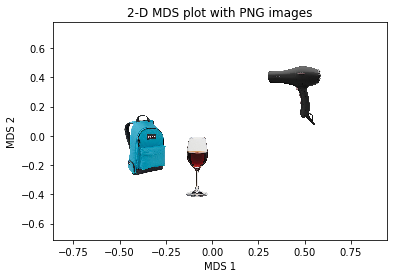

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# this is just for replication
np.random.seed(23)

# Create a sample RSA matrix
rsa_matrix = np.array([[1.0, 0.9, 0.3],
                       [0.9, 1.0, 0.7],
                       [0.3, 0.7, 1.0]])

# Apply the MDS algorithm to the RSA matrix to generate 2-D coordinates
mds = MDS(n_components=2, dissimilarity='precomputed')
mds_coords = mds.fit_transform(rsa_matrix)

# Load the PNG files
image_paths = ['image1.png', 'image2.png', 'image3.png']
images = [plt.imread(path) for path in image_paths]

# Determine the maximum of the height or width of the images
max_dims = [np.max(image.shape) for image in images]

# Create a scatter plot of the MDS solution
fig, ax = plt.subplots()

# scatter_plot = ax.scatter(mds_coords[:, 0], mds_coords[:, 1])

# Add the PNG images to the scatter plot at the appropriate locations
for i in range(len(image_paths)):
    img = OffsetImage(images[i], zoom=60/max_dims[i])
    ab = AnnotationBbox(img, mds_coords[i], xycoords='data', frameon=False)
    ax.add_artist(ab)

# Set the x- and y-axis limits
ax.set_xlim([np.min(mds_coords[:, 0])-0.5, np.max(mds_coords[:, 0])+0.5])
ax.set_ylim([np.min(mds_coords[:, 1])-0.5, np.max(mds_coords[:, 1])+0.5])

# Set the x- and y-axis labels and the plot title
ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')
ax.set_title('2-D MDS plot with PNG images')

# Show the plot
plt.show()

In this code, we first load the three PNG files using the `plt.imread()` function and store them in a list called `images`. We then create a scatter plot of the MDS solution and store it in the variable `scatter_plot`.

We then loop over the `image_paths` and create an `OffsetImage` object for each PNG file, specifying the zoom level (you can adjust this to change the size of the images). We create an `AnnotationBbox` object for each image, passing in the `OffsetImage` object, the coordinates from `mds_coords` corresponding to the current image, and specifying that the coordinates are in data space (xycoords='data'). We add the AnnotationBbox object to the scatter plot using the `add_artist()` method of the Axes object `ax`.

Finally, we set the x- and y-axis limits to ensure that all the images are visible.